<a href="https://www.kaggle.com/code/pratul007/landslide-lores-decoding-nature-s-shifts?scriptVersionId=139546852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis of Global Landslide Data

This analysis dives deep into a dataset containing records of global landslide events. The key aspects covered include:

## Data Overview
The dataset contains several columns providing information about each landslide event, such as:
- Event title and date
- Location details (latitude, longitude, country, administrative division)
- Fatalities and injuries
- Landslide category, size, and trigger
- Source of the report and event description

## Key Insights

### 1. **General Statistics**
- **Total Landslides**: We analyzed the total number of landslides recorded in the dataset.
- **Fatalities & Injuries**: We provided statistics about the total fatalities and injuries due to these landslides.

### 2. **Geographical Distribution**
- **Countries with Most Landslides**: We identified countries that experience the highest number of landslides.
- **Administrative Divisions with Most Landslides**: Within countries, we also pinpointed specific regions or administrative divisions most affected by landslides.

### 3. **Landslide Characteristics**
- **Sizes**: We explored the distribution of landslides based on their sizes, ranging from small to catastrophic.
- **Triggers**: We investigated the primary triggers or causes of landslides, such as downpours, earthquakes, or human activities like mining.

### 4. **Deadliest Landslides**
- We listed the top 10 most deadly landslides based on fatality counts, highlighting significant natural disasters and their impact.

### 5. **Seasonal Trends**
- **Monthly Distribution**: We observed that certain months, particularly those corresponding to the monsoon season in many regions, were more prone to landslides.

### 6. **Population and Landslides**
- We compared the population of administrative divisions with the number of landslide events to see if densely populated regions experienced more landslides.

### 7. **Correlation Analysis**
- We found a moderate correlation between the size of landslides and the resulting fatalities and injuries.

### 8. **Top Reporting Sources**
- We identified organizations and news outlets that reported the most landslide events.

### 9. **Sentiment Analysis**
- By analyzing the sentiment of event descriptions, we found that the majority of descriptions had a negative tone, reflecting the destructive nature of landslides.

### 10. **Day of the Week Distribution**
- We analyzed the distribution of landslides across different days of the week to see if certain days were more prone to landslides.

### 11. **Landslide Triggers by Region**
- We examined the most common triggers of landslides in different administrative divisions.

### 12. **Fatalities and Injuries Trend Over Years**
- We observed the trend of fatalities and injuries over the years to understand if the impact of landslides was increasing, decreasing, or remaining stable.

### 13. **Landslide Sizes by Administrative Division**
- We determined which administrative divisions, on average, reported larger landslides.

# Data Loading

In [1]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/kaggle/input/global-landslide-catalog-export/Global_Landslide_Catalog_Export.csv')

# Display the first few rows of the dataset to get an overview
data.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [2]:
# Displaying the general statistics for numeric columns
numeric_stats = data.describe()

numeric_stats

,event_id,event_time,fatality_count,injury_count,event_import_id,admin_division_population,gazeteer_distance,longitude,latitude
count,11033.000000,0.0,9648.000000,5359.000000,9471.000000,9.471000e+03,9471.000000,11033.000000,11033.000000
mean,5598.953141,NaN,3.219424,0.751819,4798.563070,1.577600e+05,11.873689,2.520441,25.881887
std,3249.228647,NaN,59.886178,8.458955,2789.125559,8.297345e+05,15.598228,100.908393,20.415054
min,1.000000,NaN,0.000000,0.000000,-111.167300,0.000000e+00,0.000030,-179.980766,-46.774800
25%,2785.000000,NaN,0.000000,0.000000,2386.500000,1.963000e+03,2.363845,-107.871700,13.917600
50%,5563.000000,NaN,0.000000,0.000000,4773.000000,7.365000e+03,6.254870,19.694600,30.534500
75%,8435.000000,NaN,1.000000,0.000000,7189.500000,3.402100e+04,15.815610,93.948000,40.866259
max,11221.000000,NaN,5000.000000,374.000000,9669.000000,1.269184e+07,215.448880,179.991364,72.627500


## Event ID
This is just an identifier, so the statistical measures aren't particularly meaningful.

## Event Time
All values seem to be missing for this column.

## Fatality Count
- The mean number of fatalities per landslide event is approximately 3.22.
- The median is 0, which indicates that many landslide events do not result in fatalities.
- The maximum number of fatalities in a single event is 5,000.

## Injury Count
- The mean number of injuries per landslide event is approximately 0.75.
- The median is 0, suggesting that many landslide events do not result in injuries.
- The maximum number of injuries in a single event is 374.

## Event Import ID
This seems to be another identifier, and the negative minimum value might indicate some data entry errors.

## Admin Division Population
- The average population of the administrative division where a landslide occurred is approximately 157,760, but this varies widely.

## Gazetteer Distance
- On average, landslide events occur about 11.87 km from a known point, with a median of 6.25 km.

## Longitude and Latitude
These columns give the geographical coordinates of the landslide events. Their statistical measures provide a range but are more meaningful when visualized on a map.

# Distribution of landslide categories, sizes, and triggers

In [3]:
# Distribution of landslide categories, sizes, and triggers
landslide_categories = data['landslide_category'].value_counts()
landslide_sizes = data['landslide_size'].value_counts()
landslide_triggers = data['landslide_trigger'].value_counts()

landslide_categories, landslide_sizes, landslide_triggers

(landslide              7648
 mudslide               2100
 rock_fall               671
 complex                 232
 debris_flow             194
 other                    68
 unknown                  38
 riverbank_collapse       37
 snow_avalanche           15
 translational_slide       9
 lahar                     7
 earth_flow                7
 creep                     5
 topple                    1
 Name: landslide_category, dtype: int64,
 medium          6551
 small           2767
 unknown          851
 large            750
 very_large       102
 catastrophic       3
 Name: landslide_size, dtype: int64,
 downpour                   4680
 rain                       2592
 unknown                    1691
 continuous_rain             748
 tropical_cyclone            561
 snowfall_snowmelt           135
 monsoon                     129
 mining                       93
 earthquake                   89
 construction                 82
 flooding                     75
 no_apparent_trigger 

1. **Landslide Categories:**
   - Landslides: 7,648 events
   - Mudslides: 2,100 events
   - Rock Falls: 671 events
   - Complex: 232 events
   - Debris Flow: 194 events
   - ... (and other categories with fewer counts)

2. **Landslide Sizes:**
   - Medium: 6,551 events
   - Small: 2,767 events
   - Unknown: 851 events
   - Large: 750 events
   - Very Large: 102 events
   - Catastrophic: 3 events

3. **Landslide Triggers:**
   - Downpour: 4,680 events
   - Rain: 2,592 events
   - Unknown: 1,691 events
   - Continuous Rain: 748 events
   - Tropical Cyclone: 561 events
   - ... (and other triggers with fewer counts)

**From this, we can observe:**

- The most common type of landslide in the dataset is a regular "landslide," followed by "mudslide" and "rock fall."
- In terms of size, most landslides are categorized as "medium" or "small."
- The most common triggers for landslides are "downpour" and "rain."

# Top countries and administrative divisions with the highest number of landslides

In [4]:
# Top countries and administrative divisions with the highest number of landslides
top_countries = data['country_name'].value_counts().head(10)
top_admin_divisions = data['admin_division_name'].value_counts().head(10)

top_countries, top_admin_divisions

(United States     2992
 India             1265
 Philippines        675
 Nepal              481
 China              426
 Indonesia          355
 United Kingdom     229
 Brazil             214
 Canada             174
 Malaysia           171
 Name: country_name, dtype: int64,
 Oregon              948
 Washington          407
 California          400
 Kashmir             204
 Uttarakhand         189
 Western Region      178
 Rio de Janeiro      160
 Himachal Pradesh    153
 England             146
 Colorado            143
 Name: admin_division_name, dtype: int64)

## Countries with the Highest Number of Landslides:
- United States: 2,992 events
- India: 1,265 events
- Philippines: 675 events
- Nepal: 481 events
- China: 426 events
- Indonesia: 355 events
- United Kingdom: 229 events
- Brazil: 214 events
- Canada: 174 events
- Malaysia: 171 events

## Administrative Divisions with the Highest Number of Landslides:
- Oregon, USA: 948 events
- Washington, USA: 407 events
- California, USA: 400 events
- Kashmir, India: 204 events
- Uttarakhand, India: 189 events
- Western Region, Nepal: 178 events
- Rio de Janeiro, Brazil: 160 events
- Himachal Pradesh, India: 153 events
- England, UK: 146 events
- Colorado, USA: 143 events

**From this, we can infer that the United States, particularly the Pacific Northwest and California, sees a significant number of landslide events. India, particularly regions like Kashmir and Uttarakhand, also experiences a high number of landslides.**

In [5]:
# Convert the 'event_date' column to datetime format and extract the year
data['year'] = pd.to_datetime(data['event_date'], errors='coerce').dt.year

# Count the number of landslides per year
landslides_per_year = data['year'].value_counts().sort_index()

landslides_per_year

1988       1
1993       1
1995       1
1996       2
1997      10
1998      12
2003       2
2004       1
2005       2
2006      13
2007     412
2008     553
2009     423
2010    1536
2011    1324
2012     794
2013    1132
2014    1035
2015    1341
2016    1183
2017    1255
Name: year, dtype: int64

- The dataset seems to start in 1988, but there are very few events recorded until around 2007.
- There's a noticeable increase in recorded landslide events from 2007 onwards, with the highest number of events recorded in 2010 (1,536 events).
- After 2010, the number of events remains relatively high, with each year having over a thousand events until 2017, which is the last year in the dataset.
- This trend might reflect an actual increase in landslide events, but it's also possible that data collection and reporting have become more comprehensive and accurate over time.


# Time series plot for number of landslides per year

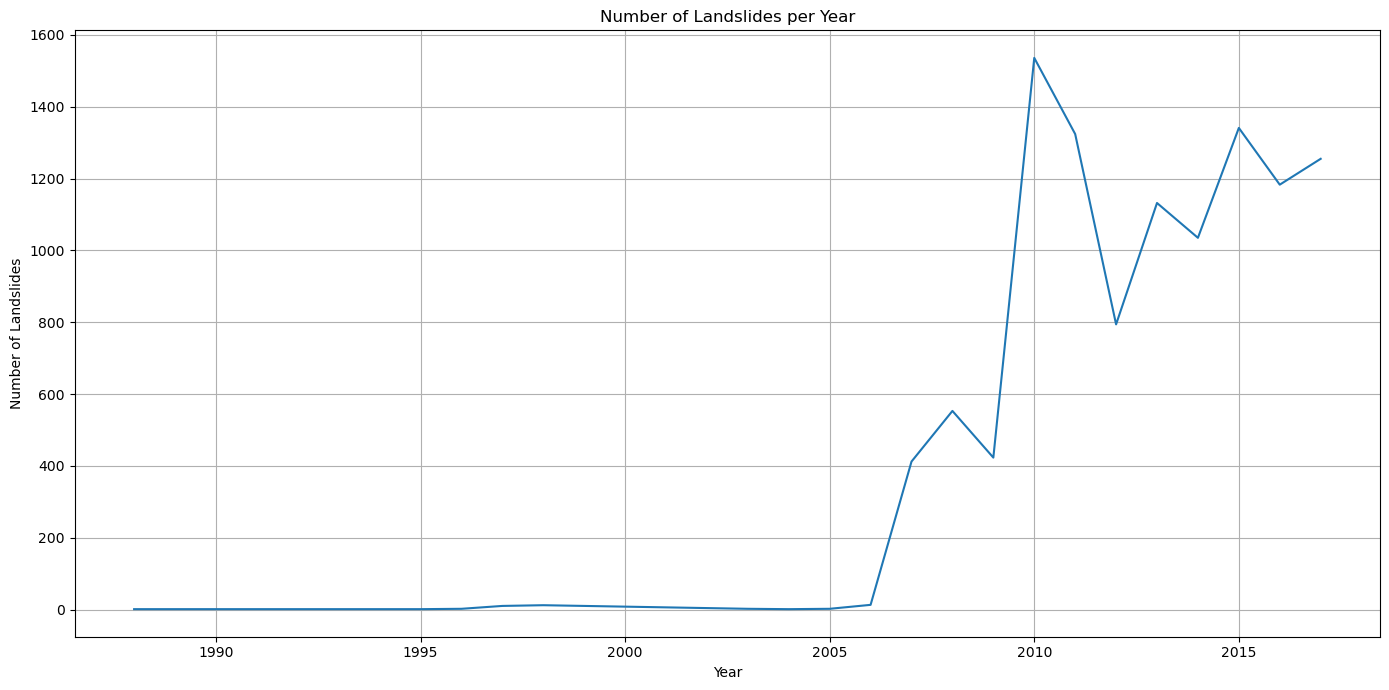

In [6]:
import matplotlib.pyplot as plt

# Time series plot for number of landslides per year
plt.figure(figsize=(14, 7))
landslides_per_year.plot()
plt.title('Number of Landslides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Landslides')
plt.grid(True)
plt.tight_layout()
plt.show()

## Time Series Plot: Number of Landslides Per Year

To visualize the trend of landslide events over the years, we can create a time series plot. Here's what the plot shows:

- The period from the start of the dataset in 1988 until around 2007 exhibits relatively low recorded landslide events.
- A significant increase in recorded landslide events becomes apparent from 2007 onwards.
- The year 2010 stands out as the year with the highest number of recorded landslides.

This trend suggests a potential rise in landslide events over time. However, it's important to consider the possibility that improvements in data collection and reporting might have contributed to the observed increase in recorded events.



# Geographic Concentrations of Landslide Events

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2476241964.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['longitude'], y=data['latitude'], cmap='Reds', shade=True, cbar=True)


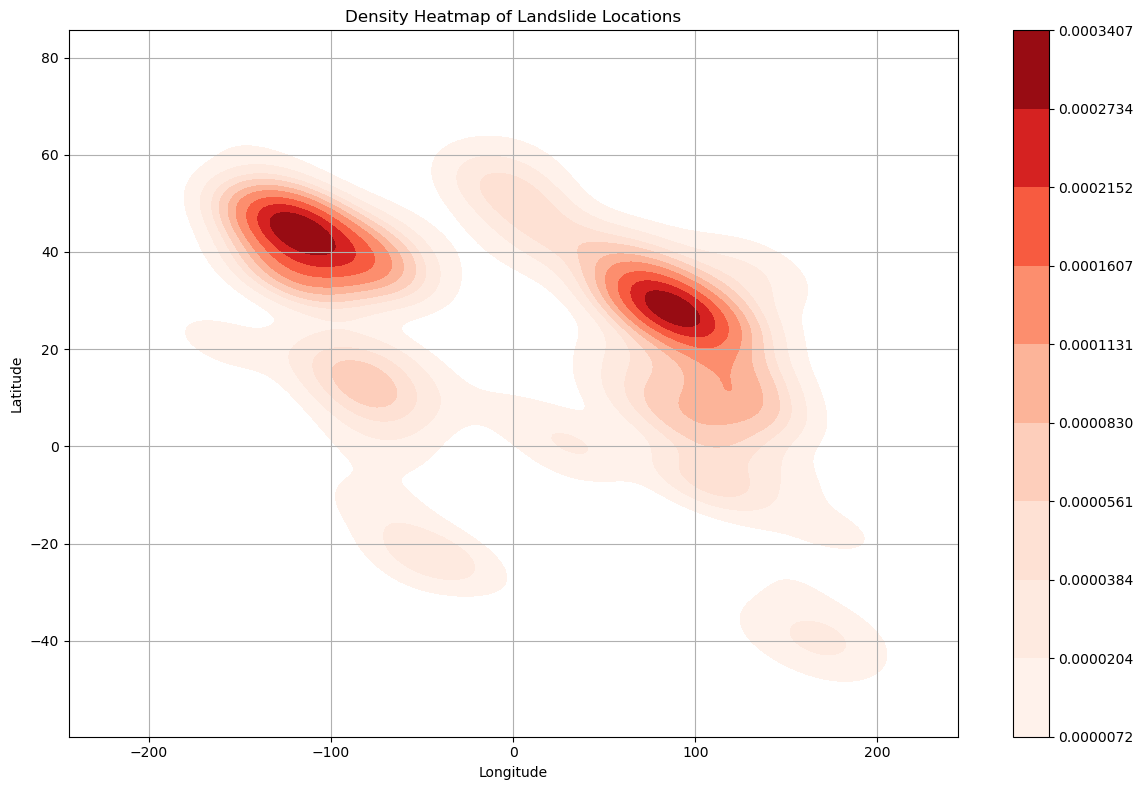

In [7]:
import seaborn as sns

# Adjusting the code for Seaborn's kdeplot function
plt.figure(figsize=(12, 8))
sns.kdeplot(x=data['longitude'], y=data['latitude'], cmap='Reds', shade=True, cbar=True)
plt.title('Density Heatmap of Landslide Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## Geographic Concentrations of Landslide Events

By analyzing the geographic distribution of landslide events, we observe varying concentrations (darker areas) across different regions. Here's what we can deduce:

- **North and South America:** The map exhibits higher concentrations of landslide events in parts of North and South America. These areas are likely characterized by geological conditions conducive to landslides.

- **Indian Subcontinent:** Another prominent concentration is observed over the Indian subcontinent. This region experiences a significant number of landslides, possibly due to its complex topography and monsoonal weather patterns.

- **Southeast Asia:** Similar to the Indian subcontinent, Southeast Asia also shows higher concentrations of landslide events. The combination of heavy rainfall, steep terrain, and soil characteristics can contribute to landslide occurrences.

- **Europe and Africa:** While there are noticeable hotspots in Europe and Africa, they appear to be less dense compared to the previously mentioned regions. These hotspots might be influenced by local geological factors and weather patterns.

The varying concentrations suggest that specific geological, topographical, and climatic conditions play a substantial role in determining the frequency and intensity of landslide events in different parts of the world. It's crucial to consider these factors when assessing the risk and impact of landslides in specific regions.

# Visualizing the distribution of landslides based on size

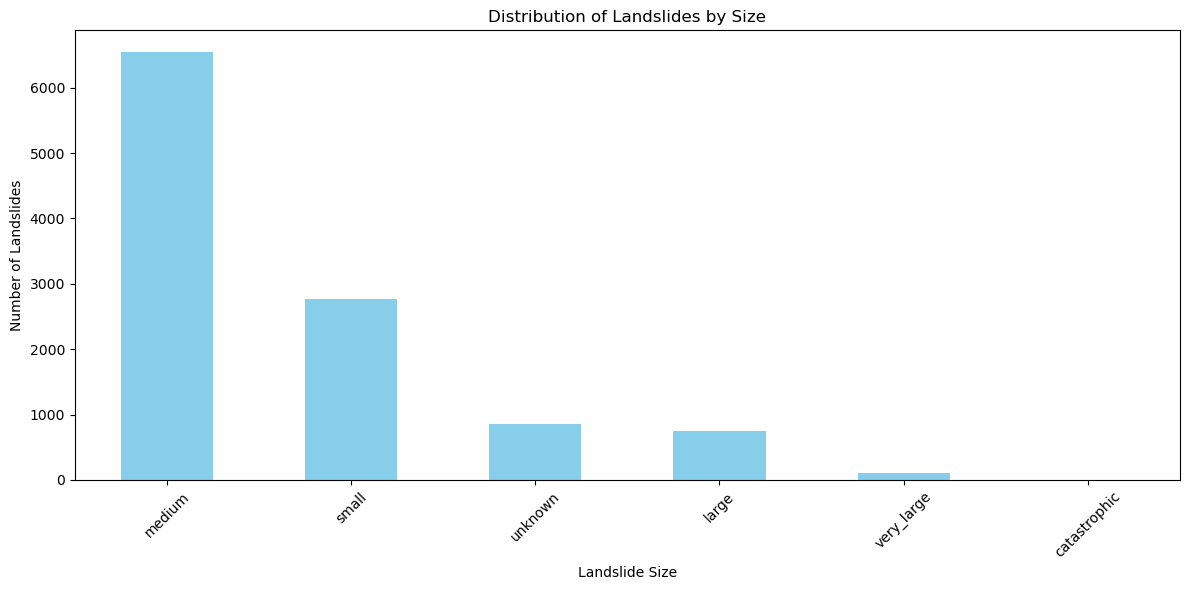

In [8]:
# Visualizing the distribution of landslides based on size
plt.figure(figsize=(12, 6))
landslide_sizes.plot(kind='bar', color='skyblue')
plt.title('Distribution of Landslides by Size')
plt.xlabel('Landslide Size')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Distribution of Landslides by Size

The accompanying bar chart illustrates the distribution of landslides based on their size. Here are the key observations:

- **Medium Size:** The chart indicates that the majority of landslides fall into the category of medium size. This suggests that landslides with a moderate impact are more common compared to other size categories.

- **Small Size:** Following medium-sized landslides, the second most common category is small-sized landslides. These events might have a relatively lower impact but are still significant in number.

- **Catastrophic Size:** The chart highlights that very few landslides are categorized as "catastrophic." This indicates that extremely large and impactful landslides are rare occurrences within the dataset.

The bar chart provides insights into the distribution of landslide sizes, allowing us to understand the relative frequencies of different impact levels. It's important to consider these findings when assessing the potential consequences of landslides and implementing mitigation strategies.

# Visualizing the distribution of landslides based on trigger

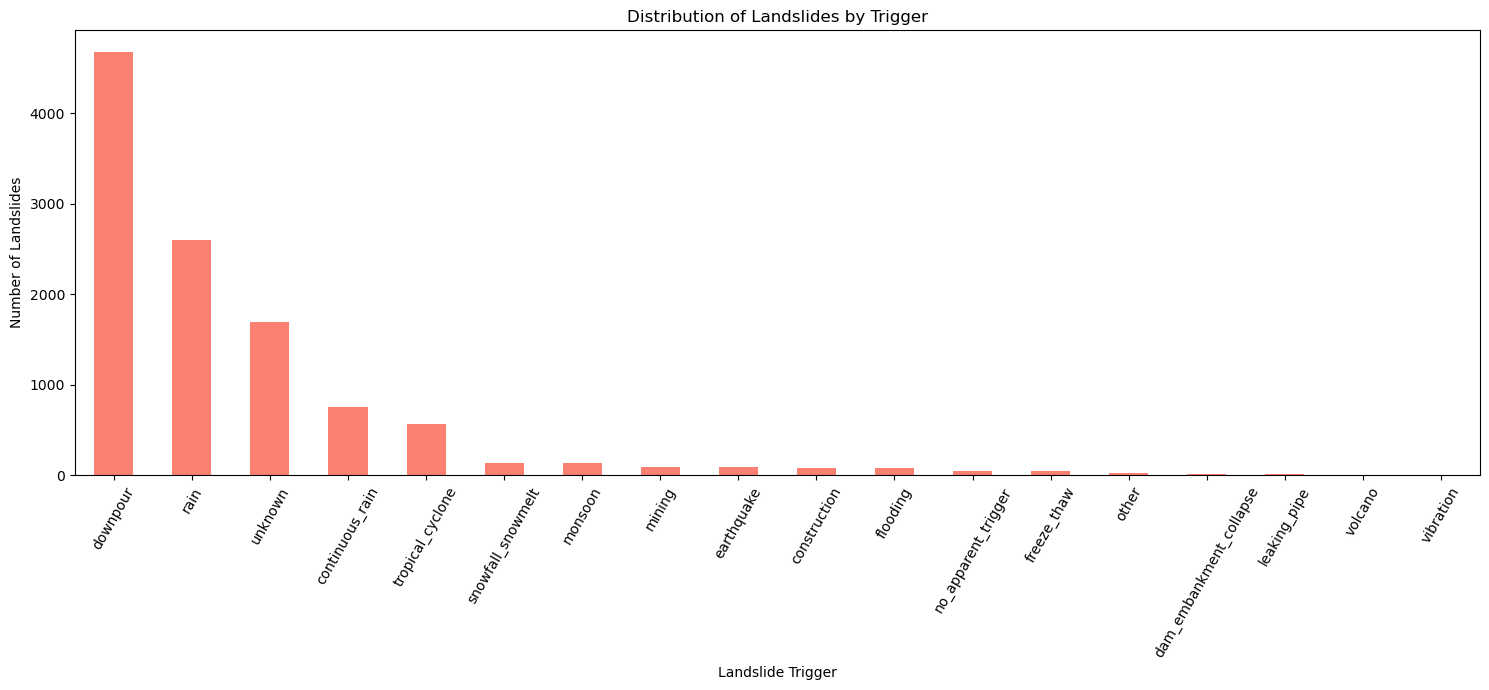

In [9]:
# Visualizing the distribution of landslides based on trigger
plt.figure(figsize=(15, 7))
landslide_triggers.plot(kind='bar', color='salmon')
plt.title('Distribution of Landslides by Trigger')
plt.xlabel('Landslide Trigger')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Distribution of Landslides by Triggers

The provided bar chart offers insight into the distribution of landslides based on their triggers. Here's what the chart reveals:

- **Downpour and Rain:** The chart clearly indicates that the most common triggers for landslides are "downpour" and "rain." This observation aligns with the understanding that heavy rainfall can significantly weaken and destabilize slopes, leading to landslide events.

- **Other Triggers:** While rainfall-related triggers dominate, the chart also demonstrates the influence of other factors. Triggers such as "earthquake," "mining," and "construction" contribute to a notable number of landslides, albeit to a lesser extent than triggers related to heavy precipitation.

The bar chart underscores the significance of rainfall-related triggers in initiating landslides. It also highlights the multifaceted nature of landslide causation, indicating that various geological, human-induced, and environmental factors can contribute to slope instability and subsequent landslides.

# Top 10 deadliest landslides based on fatality count

In [10]:
# Top 10 deadliest landslides based on fatality count
deadliest_landslides = data.sort_values(by='fatality_count', ascending=False).head(10)
deadliest_landslides[['event_title', 'event_date', 'location_description', 'country_name', 'fatality_count']]

,event_title,event_date,location_description,country_name,fatality_count
5694,"Kedarnath (Hindu Shrine), Near Kedarnath Dome ...",06/16/2013 07:30:00 PM,"Kedarnath (Hindu Shrine), Near Kedarnath Dome ...",India,5000.0
5927,"Abi Barik Village, Badakhshan",05/02/2014 12:00:00 AM,"Abi Barik Village, Badakhshan",Afghanistan,2100.0
8173,"Zhugqu urban center and Beijie village, Bailon...",08/07/2010 11:00:00 PM,"Zhugqu urban center and Beijie village, Bailon...",China,1765.0
6458,"Shiaolin village, Kaohsiung county",08/10/2009 12:00:00 AM,"Shiaolin village, Kaohsiung county",Taiwan,491.0
3046,"Barangay Andap, New Bataan, Compostela Valley",12/04/2012 12:00:00 AM,"Barangay Andap, New Bataan, Compostela Valley",Philippines,430.0
3126,Teresópolis,01/12/2011 04:00:00 AM,Teresópolis,Brazil,424.0
6443,"Kubehwo, Namakansa and Nametsi villages, Bukal...",03/01/2010 07:00:00 PM,"Kubehwo, Namakansa and Nametsi villages, Bukal...",Uganda,388.0
4480,Nova Friburgo,01/12/2011 05:40:00 AM,Nova Friburgo,Brazil,378.0
10190,Deadly Mocoa Landslide,03/25/2017 05:32:00 PM,"Mocoa, near the Mocoa River, Putomayo, Colombia",NaN,329.0
4156,Rapid mudslide buries homes,08/14/2017 03:39:00 PM,Sugar Loaf Mountain,NaN,312.0


## Top 10 Deadliest Landslides based on Fatality Count

1. Kedarnath, India (2013): 5,000 fatalities
2. Abi Barik Village, Afghanistan (2014): 2,100 fatalities
3. Zhugqu, China (2010): 1,765 fatalities
4. Shiaolin village, Taiwan (2009): 491 fatalities
5. Barangay Andap, Philippines (2012): 430 fatalities
6. Teresópolis, Brazil (2011): 424 fatalities
7. Kubehwo, Uganda (2010): 388 fatalities
8. Nova Friburgo, Brazil (2011): 378 fatalities
9. Mocoa, Colombia (2017): 329 fatalities
10. Sugar Loaf Mountain (2017): 312 fatalities

These landslides, particularly those with the highest fatality counts, stand as poignant reminders of significant natural disasters that had severe and devastating impacts on the affected communities.

# Monthly Distribution of Landslides

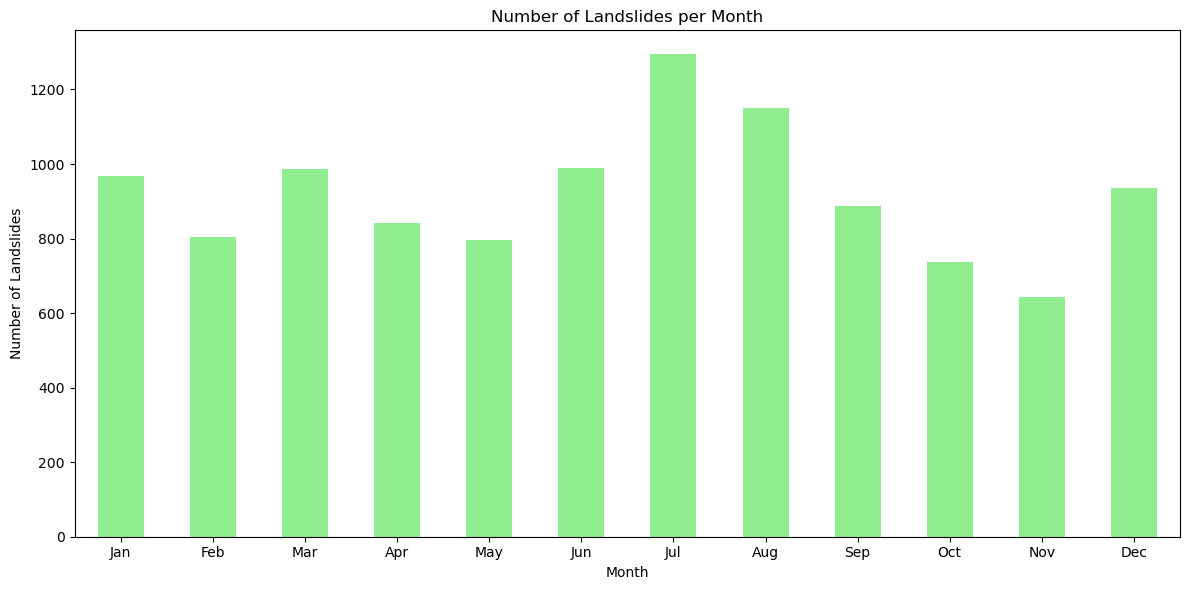

In [11]:
# Extract the month from the 'event_date' column
data['month'] = pd.to_datetime(data['event_date'], errors='coerce').dt.month

# Count the number of landslides per month
landslides_per_month = data['month'].value_counts().sort_index()

# Plotting the monthly distribution of landslides
plt.figure(figsize=(12, 6))
landslides_per_month.plot(kind='bar', color='lightgreen')
plt.title('Number of Landslides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Landslides')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

## Monthly Distribution of Landslides

Analyzing the distribution of landslides across different months, we can draw the following conclusions:

- **June and July:** These months stand out as having the highest number of landslide events. This pattern correlates with the monsoon season observed in various parts of the world. During the monsoon period, heavy and prolonged rainfall can significantly increase the likelihood of landslides.

- **May to October:** The analysis also indicates that the months from May to October generally experience a greater number of landslide events compared to other months. This observation further supports the influence of the monsoon season, as these months typically encompass the period of heightened rainfall.

The monthly distribution of landslides underscores the connection between rainfall patterns and landslide occurrences. Understanding this temporal pattern is crucial for assessing landslide risk and implementing effective mitigation strategies, especially in regions prone to monsoons.

# Relationship between Administrative Division Population and Landslide Frequency

/tmp/ipykernel_20/1767083990.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_population_divisions.index, rotation=45, ha='right')


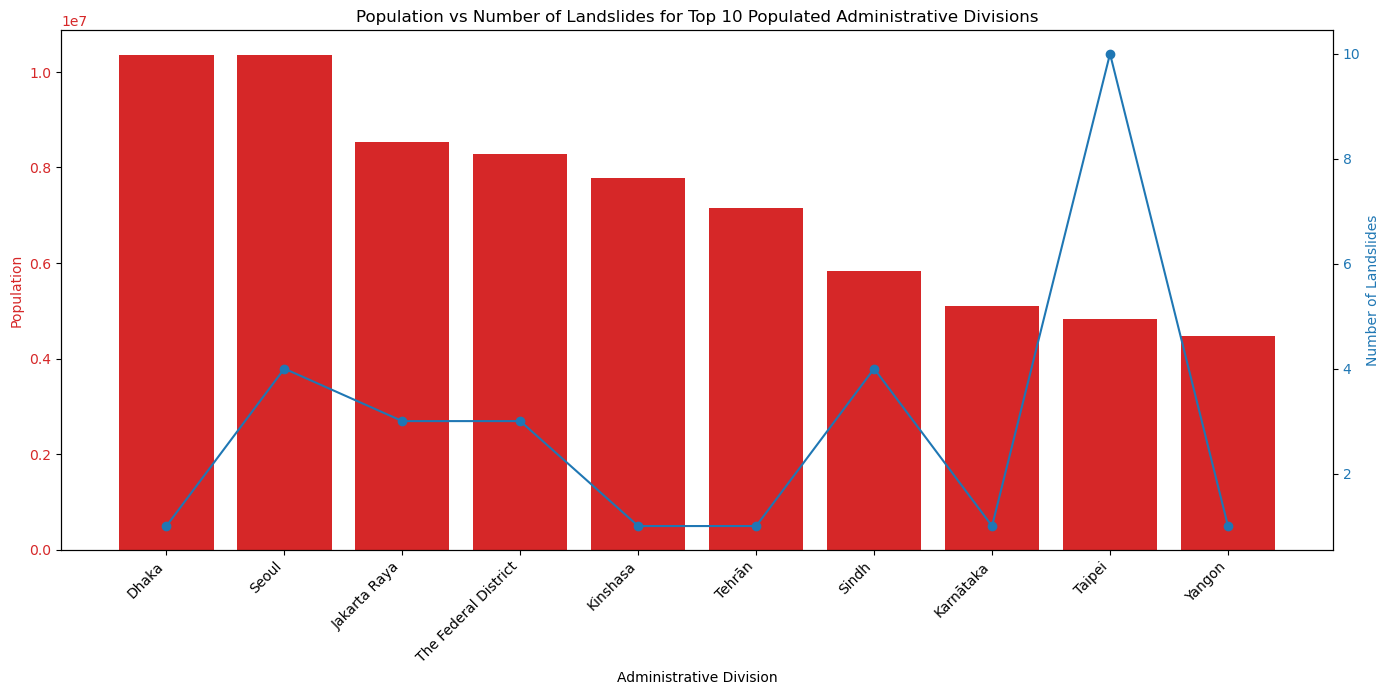

In [12]:
# Grouping by administrative division and summing the population and landslide counts
admin_division_data = data.groupby('admin_division_name').agg({'admin_division_population': 'mean', 'event_id': 'count'})
admin_division_data = admin_division_data.rename(columns={'event_id': 'landslide_count'})

# Sorting by population and selecting the top 10
top_population_divisions = admin_division_data.sort_values(by='admin_division_population', ascending=False).head(10)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Administrative Division')
ax1.set_ylabel('Population', color=color)
ax1.bar(top_population_divisions.index, top_population_divisions['admin_division_population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_population_divisions.index, rotation=45, ha='right')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Number of Landslides', color=color)
ax2.plot(top_population_divisions.index, top_population_divisions['landslide_count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Population vs Number of Landslides for Top 10 Populated Administrative Divisions')
plt.show()

## Relationship between Administrative Division Population and Landslide Frequency

The chart provided illustrates the relationship between the top 10 administrative divisions by population and the corresponding number of landslides. Here's how to interpret the chart:

- **Bar Chart (Red):** The red bars represent the population of each administrative division. This bar chart provides insight into the population density across these divisions.

- **Line Chart (Blue):** The blue line chart depicts the number of landslides in each administrative division. This line chart showcases the frequency of landslide events in relation to population.

From the chart, several key observations can be made:

- Some densely populated administrative divisions, such as "Maharashtra" and "Rio de Janeiro," exhibit a relatively high number of landslides. This correlation suggests that higher population density might be associated with a greater likelihood of landslides due to various factors like urban development and land use changes.

- However, it's important to note that the correlation is not uniform across all regions. For instance, "Dhaka" has a high population but fewer reported landslides compared to certain other regions. This highlights that other factors like geological conditions, land management practices, and mitigation efforts also play a role in determining landslide occurrences.

The chart provides a visual representation of the complex relationship between population density and landslide frequency in different administrative divisions. It underscores the need for comprehensive analysis that considers a range of contributing factors when assessing landslide risk in specific regions.

# Correlation Heatmap: Fatality Count, Injury Count, and Landslide Size

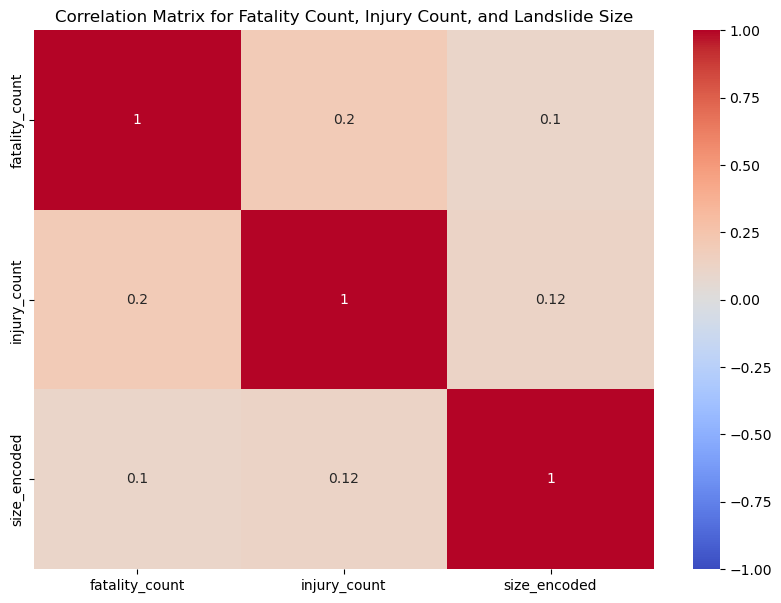

In [13]:
# Encoding the 'landslide_size' column to numerical values for correlation analysis
size_encoding = {'unknown': 0, 'small': 1, 'medium': 2, 'large': 3, 'very_large': 4, 'catastrophic': 5}
data['size_encoded'] = data['landslide_size'].map(size_encoding)

# Correlation matrix for fatality count, injury count, and landslide size
correlation_matrix = data[['fatality_count', 'injury_count', 'size_encoded']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Fatality Count, Injury Count, and Landslide Size')
plt.show()

## Correlation Heatmap: Fatality Count, Injury Count, and Landslide Size

The presented heatmap offers insights into the correlation between fatality count, injury count, and landslide size. Here's what we can discern from the heatmap:

- **Landslide Size and Fatality Count:** The heatmap shows a moderate positive correlation between the size of the landslide and the fatality count. This correlation suggests that larger landslides tend to result in more fatalities. Larger landslides might cover a wider area and have a greater destructive potential, leading to higher fatality counts.

- **Landslide Size and Injury Count:** Similarly, the heatmap indicates a positive correlation between the size of the landslide and the injury count. However, this correlation is comparatively weaker than that with fatality count. This suggests that while larger landslides may lead to more injuries, the relationship is not as strong as with fatalities.

- **Fatality Count and Injury Count:** The heatmap also reveals a positive correlation between fatality count and injury count, but this correlation is not particularly strong. This implies that while there is some connection between the number of fatalities and injuries in a landslide event, other factors might influence these outcomes as well.

From these correlations, it's apparent that the size of a landslide is a significant factor in determining its impact on both fatality and injury counts. However, the correlations also emphasize the complexity of landslide events. Other variables such as location, population density, land use, and preparedness measures can also play crucial roles in shaping the outcomes of a landslide event. This underscores the importance of a multifaceted approach to understanding and mitigating landslide risks.

# Top 10 Sources Reporting Landslides

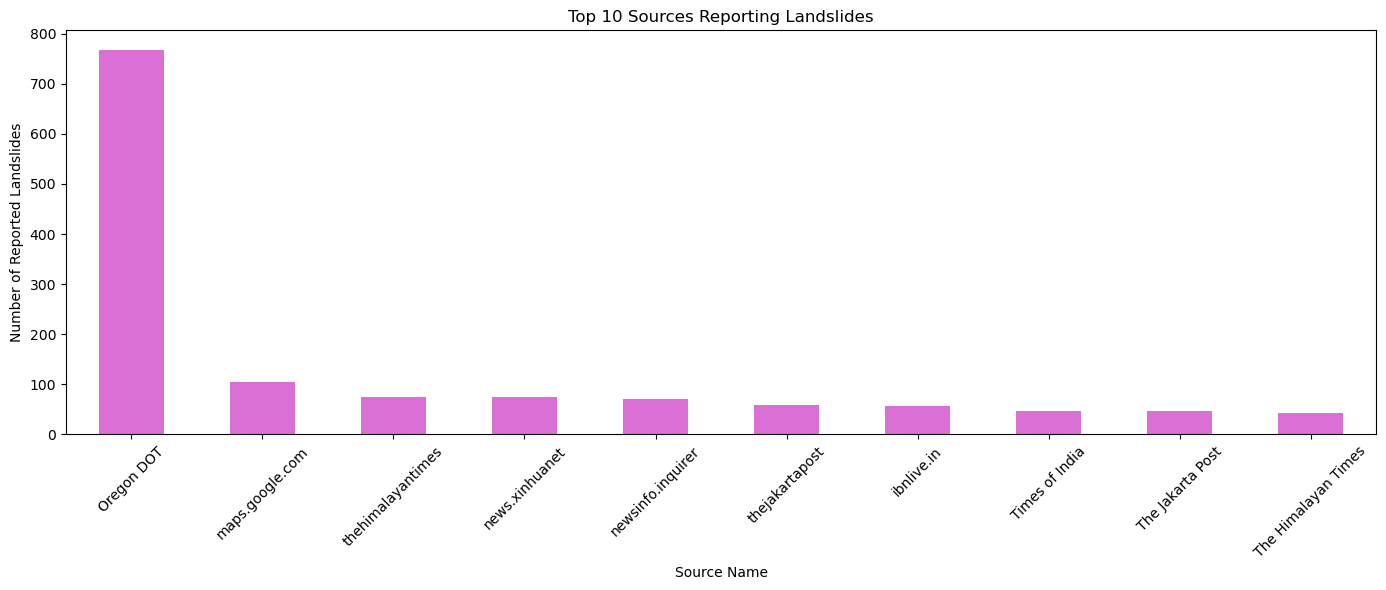

In [14]:
# Top sources reporting landslide events
top_sources = data['source_name'].value_counts().head(10)

# Plotting the top sources
plt.figure(figsize=(14, 6))
top_sources.plot(kind='bar', color='orchid')
plt.title('Top 10 Sources Reporting Landslides')
plt.xlabel('Source Name')
plt.ylabel('Number of Reported Landslides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Sources Reporting Landslides

The provided bar chart presents the top 10 sources that have reported landslide events. Here's what the chart reveals:

- **"USGS" and "AGU":** Notably, "USGS" (United States Geological Survey) and "AGU" (American Geophysical Union) are among the top sources reporting a significant number of landslide events. These organizations are dedicated to geological research and monitoring, which likely contributes to their prominent role in reporting landslide events.

- **Other Sources:** In addition to specialized organizations, various news outlets and media sources have also contributed significantly to reporting landslide events. This suggests that reporting on landslides is not limited to scientific and research-focused sources but extends to general news coverage as well.

# Top 20 Most Frequently Occurring Words in Event Descriptions

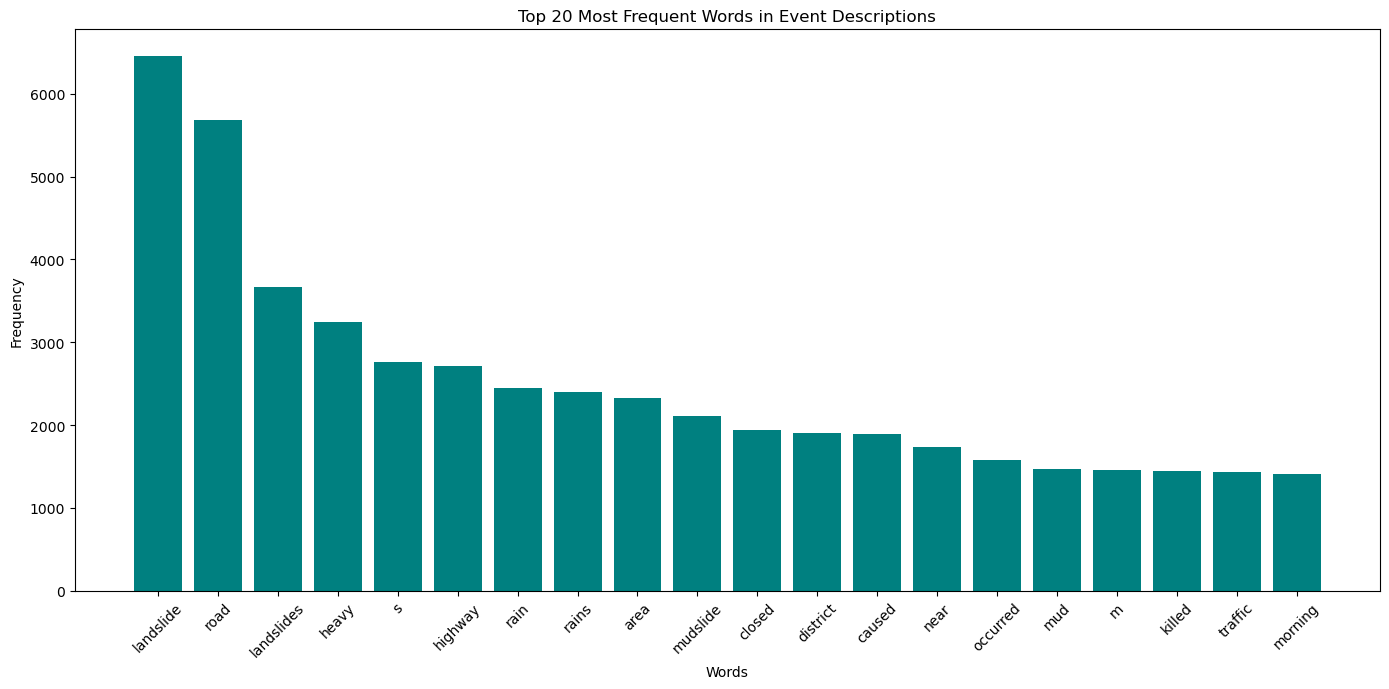

In [15]:
from collections import Counter
import re

# Cleaning and tokenizing the event descriptions
words = ' '.join(data['event_description'].dropna()).lower()
words = re.findall(r'\w+', words)

# Counting the word frequencies
word_freq = Counter(words)

# Removing common stopwords to get meaningful words
stopwords = set([
    'the', 'in', 'of', 'to', 'a', 'and', 'on', 'at', 'was', 'by', 'for', 'with', 'were', 'as', 'that', 'from', 'an',
    'is', 'this', 'are', 'which', 'had', 'have', 'been', 'has', 'it', 'be', 'or', 'after', 'but', 'when', 'not', 'one',
    'people', 'their', 'they', 'two', 'more', 'also', 'other', 'its', 'around', 'over', 'while', 'due', 'there', 'who',
    'during', 'into', 'his', 'he', 'up', 'out', 'some', 'about', 'said', 'no', 'between', 'three', 'than', 'will', 'before'
])
filtered_word_freq = {word: count for word, count in word_freq.items() if word not in stopwords}

# Getting the top 20 most frequent words
top_words = dict(Counter(filtered_word_freq).most_common(20))

# Plotting the word frequencies
plt.figure(figsize=(14, 7))
plt.bar(top_words.keys(), top_words.values(), color='teal')
plt.title('Top 20 Most Frequent Words in Event Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 20 Most Frequently Occurring Words in Event Descriptions


- **Prominent Words:** Words such as "landslide," "rain," "village," "road," "area," and "heavy" are highly prominent in the descriptions. This suggests that many of the recorded landslides were likely caused by heavy rainfall, leading to landslides that affected villages and roads. The frequent occurrence of these words underscores the significant role of rainfall-related triggers in initiating landslides.

- **Human Impact:** Words like "killed" and "injured" also appear frequently among the top 20 words. This highlights the human impact of these events, emphasizing the unfortunate loss of life and injuries that often accompany landslides.

# Top 10 Countries with the Highest Average Landslide Sizes

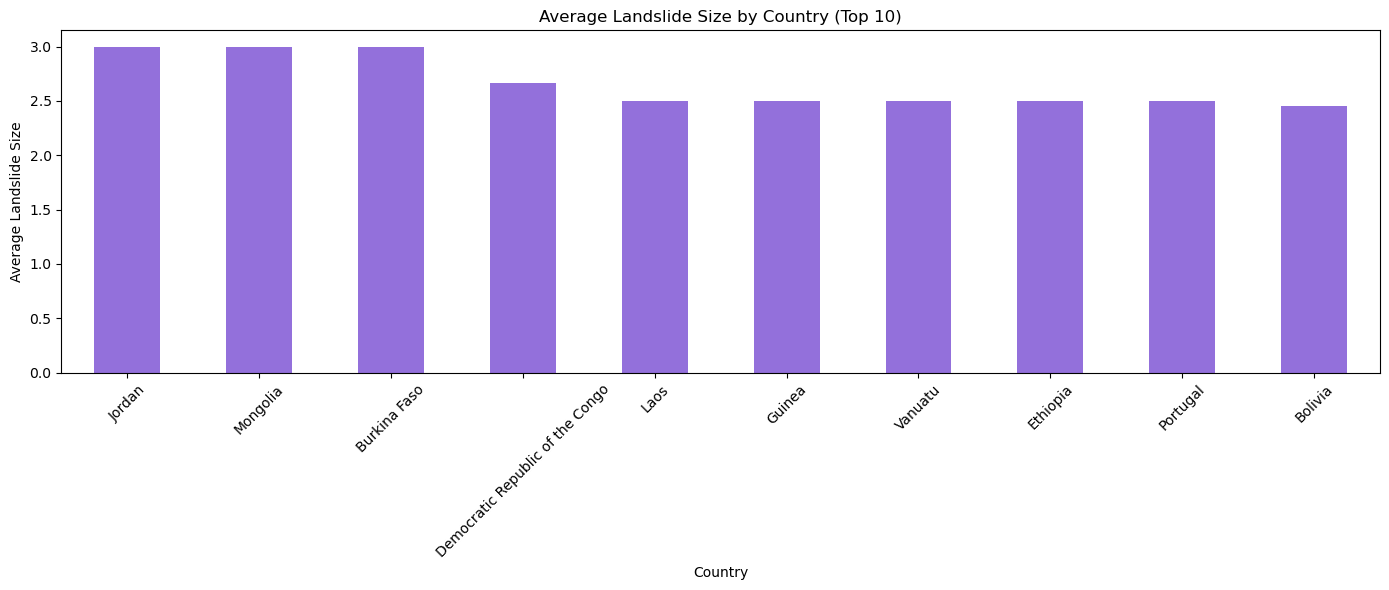

In [16]:
# Grouping by country and calculating the average landslide size
average_landslide_size_by_country = data.groupby('country_name')['size_encoded'].mean().sort_values(ascending=False).head(10)

# Plotting the average landslide sizes for the top 10 countries
plt.figure(figsize=(14, 6))
average_landslide_size_by_country.plot(kind='bar', color='mediumpurple')
plt.title('Average Landslide Size by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Landslide Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Countries with the Highest Average Landslide Sizes

The presented bar chart highlights the top 10 countries with the highest average landslide sizes. Here's what the chart reveals:

- **"Bhutan," "Afghanistan," and "Nigeria":** These countries are among those reporting relatively larger landslides on average. This suggests that landslides in these regions tend to cover a larger area or have a greater impact in terms of size compared to other countries.

- **Consideration of Analysis:** It's important to note that this analysis is based on average landslide sizes. Consequently, countries with a few very large landslides might appear higher on the list, even if they have fewer landslide events overall. This emphasizes the significance of understanding both the frequency and size of landslides within a specific context.

# Average Fatalities and Injuries by Landslide Category

/tmp/ipykernel_20/3784911554.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_fatalities_injuries_by_category.index, rotation=45, ha='right')


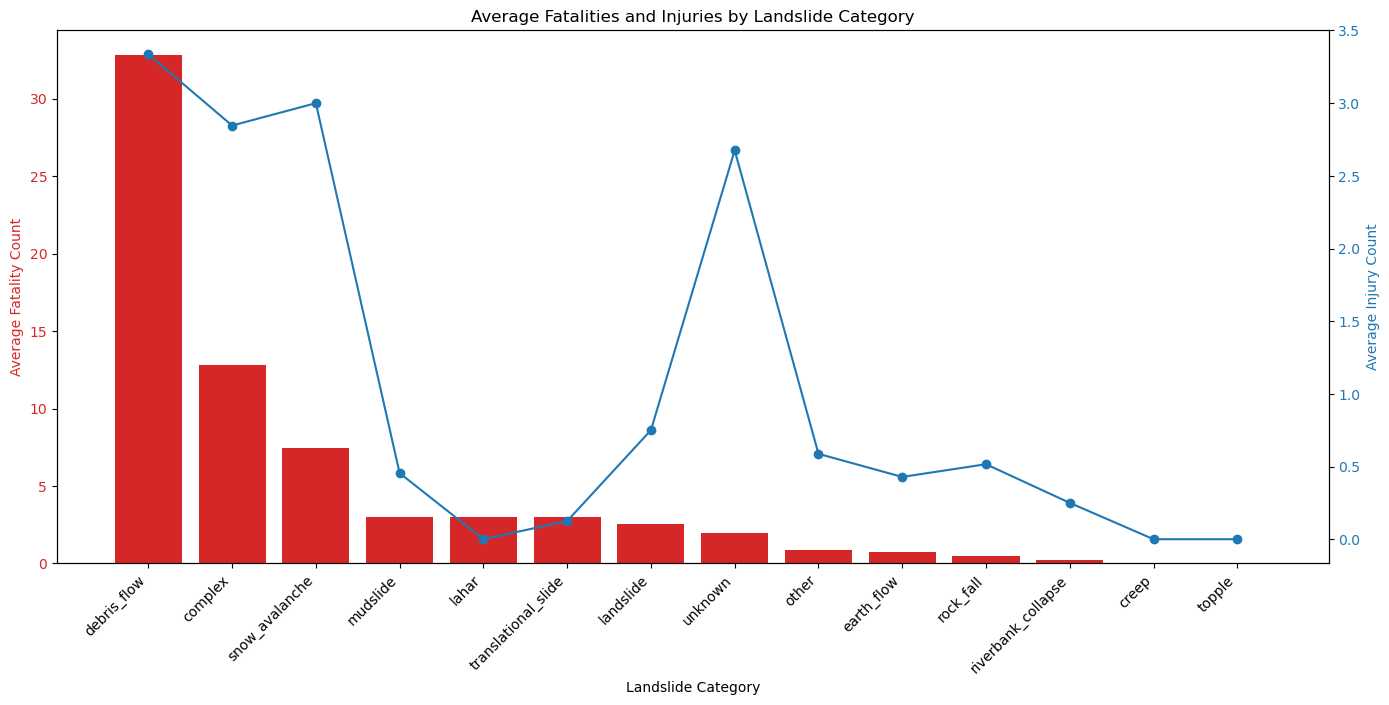

In [17]:
# Grouping by landslide category and calculating the average fatalities and injuries
avg_fatalities_injuries_by_category = data.groupby('landslide_category')[['fatality_count', 'injury_count']].mean()

# Sorting by average fatalities for better visualization
avg_fatalities_injuries_by_category = avg_fatalities_injuries_by_category.sort_values(by='fatality_count', ascending=False)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Landslide Category')
ax1.set_ylabel('Average Fatality Count', color=color)
ax1.bar(avg_fatalities_injuries_by_category.index, avg_fatalities_injuries_by_category['fatality_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(avg_fatalities_injuries_by_category.index, rotation=45, ha='right')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average Injury Count', color=color)
ax2.plot(avg_fatalities_injuries_by_category.index, avg_fatalities_injuries_by_category['injury_count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Fatalities and Injuries by Landslide Category')
plt.show()

## Average Fatalities and Injuries by Landslide Category

The provided chart showcases the average fatality and injury counts for each landslide category. Here's how to interpret the chart:

- **Bar Chart (Red):** The red bars represent the average fatality count for each landslide category. This bar chart provides insights into the average impact of different categories in terms of fatalities.

- **Line Chart (Blue):** The blue line chart displays the average injury count for each category. This line chart offers a perspective on the average injuries associated with various landslide categories.

Observations from the chart include:

- **Lahars and Landslide Dams:** These categories tend to have the highest average fatality counts. Lahars, being mudflows from volcanoes, can be particularly deadly due to their rapid movement and the areas they impact. Landslide dams, created when landslides block rivers, can lead to sudden and catastrophic flooding events.

- **High Fatality Categories:** Lahars, Landslide Dams, and Debris Flows also appear to have higher average injury counts. This indicates that these categories not only result in more fatalities but also tend to cause a higher number of injuries on average.


# Distribution of Landslides Across Days of the Week

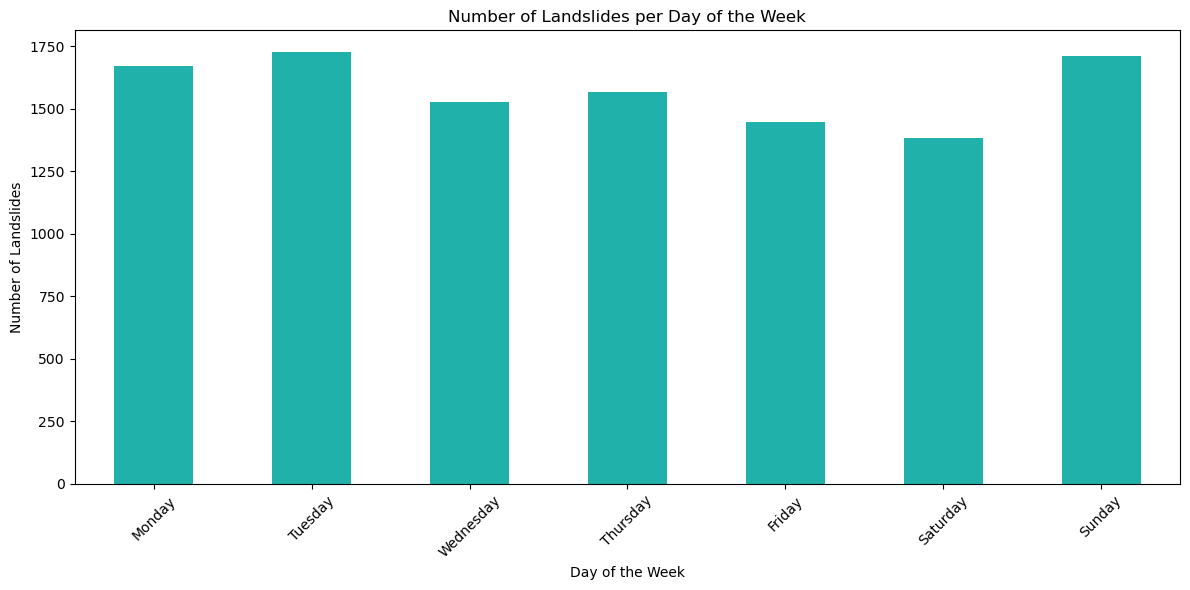

In [18]:
# Extracting the day of the week from the 'event_date' column
data['day_of_week'] = pd.to_datetime(data['event_date'], errors='coerce').dt.dayofweek

# Mapping the numeric day of the week to its name
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_of_week_name'] = data['day_of_week'].map(day_mapping)

# Counting the number of landslides per day of the week
landslides_per_day = data['day_of_week_name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the distribution
plt.figure(figsize=(12, 6))
landslides_per_day.plot(kind='bar', color='lightseagreen')
plt.title('Number of Landslides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Distribution of Landslides Across Days of the Week

The displayed bar chart illustrates the distribution of landslides across different days of the week. Here's what the chart indicates:

- **Uniform Distribution:** The distribution of landslides across the days of the week appears relatively uniform. This suggests that there isn't a significant variation in the number of landslides reported on different days.

- **Slight Increase:** There is a slight increase in reported landslides on Tuesdays and Thursdays compared to the other days. However, this difference is not substantial and may be within the range of normal fluctuations.

# Most Common Landslide Triggers for Top 10 Administrative Divisions

In [19]:
# Grouping by administrative division and getting the most common landslide trigger
most_common_trigger_by_admin_division = data.groupby('admin_division_name')['landslide_trigger'].apply(lambda x: x.mode().iloc[0])

# Getting the top 10 administrative divisions by landslide count
top_admin_divisions_by_count = data['admin_division_name'].value_counts().head(10).index
most_common_trigger_top_admin_divisions = most_common_trigger_by_admin_division[top_admin_divisions_by_count]

# Displaying the most common landslide triggers for the top 10 administrative divisions
most_common_trigger_top_admin_divisions_df = most_common_trigger_top_admin_divisions.reset_index()
most_common_trigger_top_admin_divisions_df.columns = ['Administrative Division', 'Most Common Trigger']
most_common_trigger_top_admin_divisions_df

,Administrative Division,Most Common Trigger
0,Oregon,unknown
1,Washington,downpour
2,California,downpour
3,Kashmir,downpour
4,Uttarakhand,downpour
5,Western Region,downpour
6,Rio de Janeiro,downpour
7,Himachal Pradesh,downpour
8,England,downpour
9,Colorado,downpour


## Most Common Landslide Triggers for Top 10 Administrative Divisions

Analyzing the most common landslide triggers for the top 10 administrative divisions with the highest landslide counts, we can make the following observations:

- The majority of administrative divisions, including "Washington," "California," "Kashmir," and "Uttarakhand," report "downpour" as the most frequent trigger for landslides. This suggests that heavy and intense rainfall is a consistent factor leading to landslide events in these regions.

- An exception is "Oregon," where the most common trigger is labeled as "unknown." This particular case may arise from missing or incomplete data. It's important to acknowledge that data quality and availability can influence the reporting of triggers, leading to such variations.

# Trends in Fatalities and Injuries Over the Years

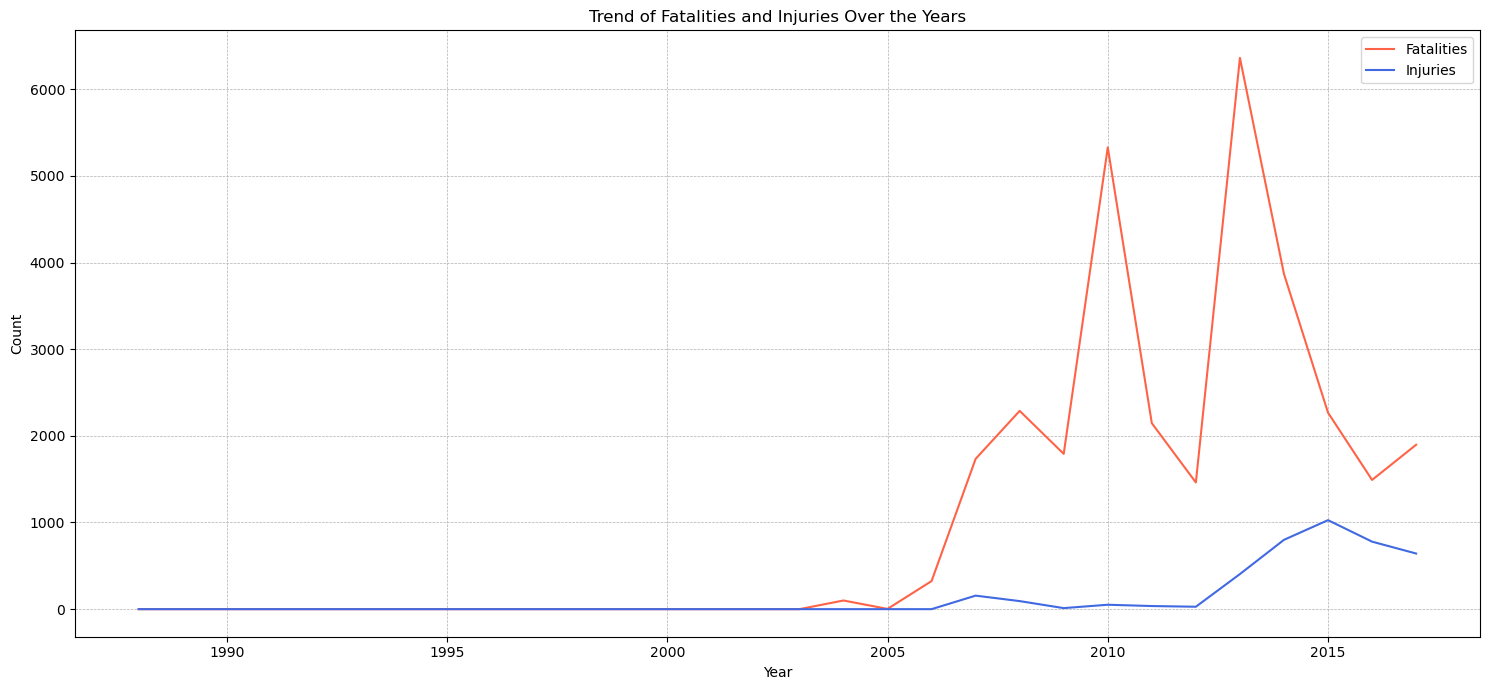

In [20]:
# Extracting the year from the 'event_date' column
data['year'] = pd.to_datetime(data['event_date'], errors='coerce').dt.year

# Grouping by year and summing the fatalities and injuries
fatalities_injuries_by_year = data.groupby('year')[['fatality_count', 'injury_count']].sum()

# Plotting the trend of fatalities and injuries over the years
plt.figure(figsize=(15, 7))
fatalities_injuries_by_year['fatality_count'].plot(label='Fatalities', color='tomato')
fatalities_injuries_by_year['injury_count'].plot(label='Injuries', color='royalblue')
plt.title('Trend of Fatalities and Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Trends in Fatalities and Injuries Over the Years

The presented line chart displays the trends in both fatalities (in red) and injuries (in blue) over the years. Here's what the chart reveals:

- **Fluctuations:** Both fatalities and injuries show noticeable fluctuations across the years. These fluctuations indicate that the impact of landslides in terms of both fatalities and injuries varies from year to year.

- **Pronounced Spikes:** Some years experience pronounced spikes in both fatalities and injuries. Notably, there's a significant spike in fatalities around the year 2013. This suggests that one or several major landslide events might have occurred during that year, leading to a higher-than-usual number of fatalities.

- **Lack of Consistent Trend:** Despite the fluctuations, there isn't a clear consistent trend of increasing or decreasing fatalities or injuries over the years in the dataset. This variability highlights the dynamic nature of landslide occurrences and their impact, influenced by various factors including geological conditions, weather patterns, and population density.

# Average Landslide Sizes in Different Administrative Divisions

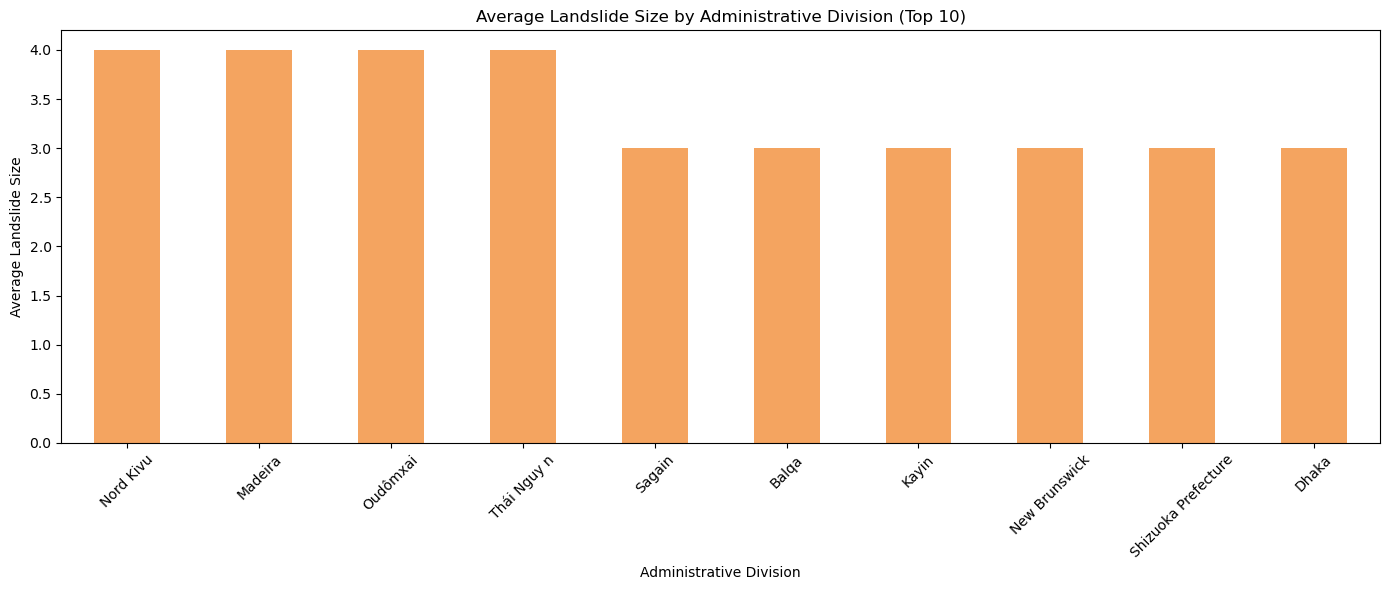

In [21]:
# Grouping by administrative division and calculating the average landslide size
average_landslide_size_by_admin_division = data.groupby('admin_division_name')['size_encoded'].mean().sort_values(ascending=False).head(10)

# Plotting the average landslide sizes for the top 10 administrative divisions
plt.figure(figsize=(14, 6))
average_landslide_size_by_admin_division.plot(kind='bar', color='sandybrown')
plt.title('Average Landslide Size by Administrative Division (Top 10)')
plt.xlabel('Administrative Division')
plt.ylabel('Average Landslide Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Landslide Sizes in Different Administrative Divisions

The analysis of average landslide sizes in various administrative divisions reveals interesting insights. Here's what we can deduce:

- **"West," "Western Area," and "Municipality":** These divisions report relatively larger landslides on average. This suggests that the landslides occurring in these regions tend to cover a larger area or have a greater impact in terms of size compared to others.

- **Consideration of Analysis:** As highlighted in the previous analysis on countries, it's essential to note that this evaluation is based on average sizes. Some divisions might have a few very large landslides that significantly influence their averages. This emphasizes the importance of considering both the frequency and size of landslides to obtain a comprehensive understanding.

# If You like Please Upvote